[<- Anterior](linearregression_simple.ipynb) | [Próximo ->](polynomialregression.ipynb)

# Regressão Linear Múltipla

Um modelo de Regressão Linear é um modelo que assume uma relação linear entre os valores de entrada e saída, isso é, a variação dos valores de saída (y) é sempre proporcional à variação dos valores de entrada (x).

Em especial, os modelos de **Regressão Linear Múltipla**, se caracterizam por utilizarem varias features (x) para estimar um target(y).

**O que será abordado**
- Imports
- Dados de teste
- Regressão Linear Múltipla
- Treinamento do Modelo
- Realizando Previsões com o modelo

> AVISO: Temas relacionados à divisão dos dados não serão aprofundados nesse documento, porém, explicações sobre esse processo podem ser encontradas na pasta [Validacao](../Validacao/README.md)

# Imports

In [ ]:
# Import da biblioteca Pandas -> Utilizada na visualização dos dados e criação do Dataframe
import pandas as pd

# Import da Biblioteca matplotlib -> Utilizada para criar uma comparação visual dos dados previstos pelo modelo
import matplotlib.pyplot as plt

# Import da função train_test_split
from sklearn.model_selection import train_test_split

# Import da Classe LinearRegression -> Utilizada para criar o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Dados de teste


Nesse documento será abordada a criação de um modelo de regressão linear múltipla utilizando um Dataset ficticio com dados sobre preço de carros de forma que o preço de um veiculo possa ser associado aos demais valores apresentados como: ano, km_rodados, num_portas e preço.

O dataset utilizado está disponível na pasta Data desse diretório [(aperte aqui para acessar)](../Data/multilinearregression.csv) e possui 100 linhas, com valores numéricos e nenhum elemento nulo, de forma que o processo de imputing não é necessário.

In [2]:
#leitura do dataset
df = pd.read_csv('../../Data/multilinearregression.csv')
df.head()

,ano,km_rodado,num_portas,preco
0,2012,60624,4,9557.521209
1,2015,50133,4,8862.174782
2,2021,103790,4,1082.340815
3,2000,72756,2,19852.921917
4,2003,134834,4,15053.799335


# Linear Regression

Para criar o modelo de Rergessão Linear Multipla, é necessário criar um objeto da classe **LinearRegression**. Isso pode ser feito através da sintáxe:

```py
nome_do_modelo = LinearRegression()
```

Veja no exemplo abaixo:

In [3]:
# Criação do modelo
multi_lr = LinearRegression()

Com esse processo, foi criado um modelo de Regressão Linear com o nome de multi_lr. Sendo assim, agora a maior parte dos processos envolvendo o modelo pode ser realizado por esse objeto.

# treinamento do modelo

O treinamento é realizado com o método `.fit()` do modelo que se deseja treinar.

Esse método necessita de dois parâmetros, sendo eles:

- x -> Features de treino.
- y - > Targets de treino

Ainda é importante ressaltar que, conforme foi abordado no documento [train_test.ipynb](../../Validacao/train_test_split.ipynb), pode ser necessário dividir o conjunto de dados utilizado em treino e teste, sendo que, **APENAS** os dados de treino são usados durante o processo de treinamento do modelo.

Veja no exemplo abaixo:

In [4]:
# Definição de um Dataframe com os dados de features
x = df.drop(columns='preco')

# Definição de um Dataframe com os dados de targets
y = df['preco']

# Separação dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Treinamento do modelo
multi_lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Após a aplicação do método `.fit()` com os conjuntos de treino o modelo esta treinado, podendo assim ser utilizado para realizar previsões com base em novos conjuntos de dados.

# Realizando Previsões com o modelo

Uma vez que um modelo de Regressão Linear múltipla tenha sido treinado, é possível usa-lo para realizar previsões à partir de novos dados. 

Esse processo é realizado com o método `.predict()` do modelo, esse método precisa de um único parâmetro:

x -> Conjunto de dados com os quais se deseja realizar previsões. Esses dados devem ser fornecidos na forma de um Array , que deve conter arrays com as features necessárias para realizar as previsões. Pode também ser fornecido da forma de um Dataframe com os dados necessários.

O retorno dessa função é um Array, que contém um conjunto de Arrays com os targets previstos. Ou, no caso de um Dataframe ser utilizado como parâmetro de entrada, a saída é um único array com os dados previstos.

Veja um exemplo abaixo:

Dados de Entrada
     ano  km_rodado  num_portas
83  2020      25741           2
53  2005      80381           2
70  2018      70155           4
45  2003     119794           4
44  2020      18286           4
39  2000     125896           4
22  2009      24254           4
80  2006      89983           2
10  2018      34777           4
0   2012      60624           4
18  2017      84659           4
30  2000      88696           4
73  2003      53295           2
33  2017      89904           4
90  2015     142812           4
4   2003     134834           4
76  2010     114489           2
77  2020      92127           4
12  2006      23824           4
31  2018     108611           4
--------------------
Dados Previstos
[ 4257.24088553 13755.33358564  5966.8886793  15724.57246822
  7014.71798565 17874.69822573 15750.11239046 12434.62541783
  7803.28410825 11395.35701403  6036.30654777 19805.66973223
 16805.88748617  5764.04994692  4662.28839876 14943.87861183
  7873.41548537  3181.79145308

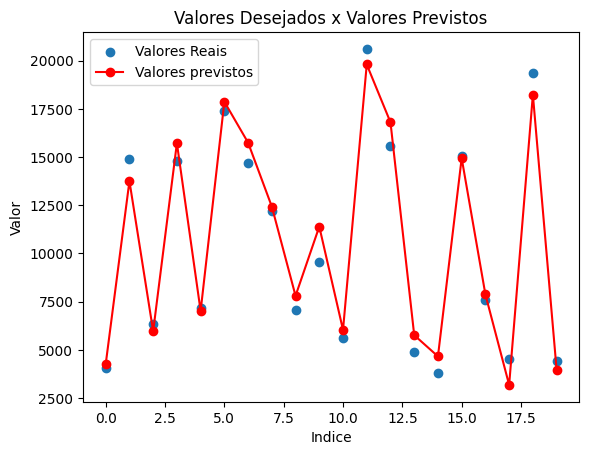

In [14]:

# Exibição dos vaores de entrada
print('Dados de Entrada')
print(x_test)

print('-'*20) # Adiciona um separador entre as entradas e saídas -> Utilizada nessa parte para melhorar a representação visual

# Previsão dos dados de teste
pred = multi_lr.predict(x_test)

# Previsão dos dados de Teste
print('Dados Previstos')
print(pred)

# Visualização dos dados previstos e saídas esperadas

# Criação de um array para unir os dados previstos e dados esperados
data = pd.DataFrame({'test': y_test.reset_index(drop=True),
                     'pred': pred})

# Criação da visualização dos dados previstos
plt.scatter(data.index, data['test'], label = 'Valores Reais')
plt.plot(data.index, data['pred'], marker = 'o', color = 'red', label = 'Valores previstos')
plt.title('Valores Desejados x Valores Previstos')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.legend()
plt.show()

Dessa forma, percebe-se que para realizar uma previsão é necessário que os dados estejam ordenados na forma de um Array com a seguinte estrutura.

features = [[x11, x12], [x21, x22], ..., [xni, xni]] ou um dataframe cujas colunas sejam as necessárias para as previsões.

Da mesma forma, após aplicar o método `.predict()` o resultado é um Array de mesma estrutura, porém, contendo os valores previstos (isso é, o valor de y para a respectiva entrada x, no array forncecido). Sendo assim:

`*nome_do_modelo*.predict(features)`, retorna: [[y1], [y2], ..., [yn]]   

onde:   

y1 é a previsão feita com a entrada x11, x12 [...] x - y2 é a previsão feita com a entrada x21, x22 [...] - etc...

> Esse modelo também pode pode ser usado de forma simples, isso é, pode também possuir apenas uma feature (x) e um target (y)

> Esse modelo também pode ser usado de forma polinomial, isso é, aplicando os dados após tratar com a classe PolynomialFeatures()

#
[<- Anterior](linearregression_simple.ipynb) | [Próximo ->](polynomialregression.ipynb)